# 딥러닝의 통계적 이해 7장 오토인코더와 GAN
## 인자분석과 GAN

<p style='text-align: right;'> 2021.10.23. </p>
<p style='text-align: right;'> 발표자 최경호 </p>

[colab에서 열기](https://colab.research.google.com/github/attagungho/knou/blob/main/SUD/1023_ch7_fa_gan.ipynb)
<br>
---
<a id="index"></a>
+ 목차
  + [인자분석](#fa)
    + 주성분분석과 인자분석
    + PAF(Principal Axis Factoring)
    + MLE(Maximum Likelihood Estimation)
      + 확률밀도함수 아는 경우
      + 확률밀도함수 모르는 경우
  + [EM 알고리즘](#em)
    + 이단계 알고리즘
  +[GAN](#gan)
    + 판별자와 생성자
    + loss 함수
    + gan 종류

<a id="fa"></a>
### 인자분석
+ **주성분분석과 인자분석**

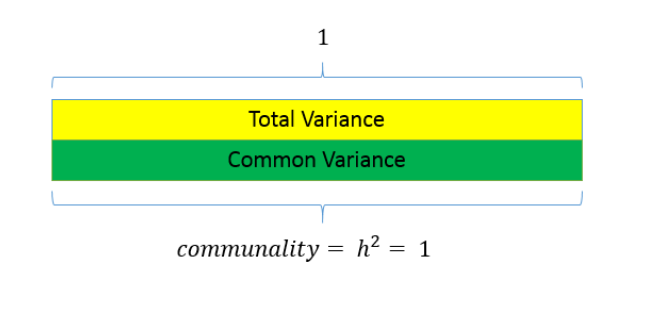

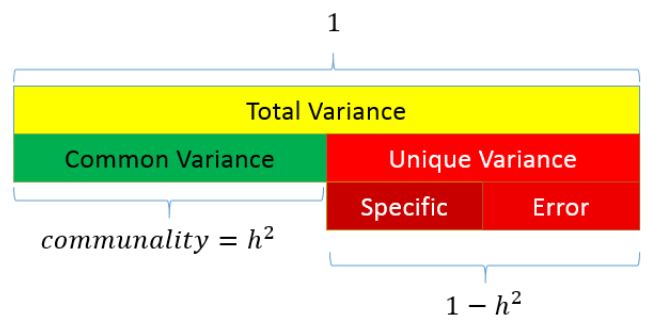

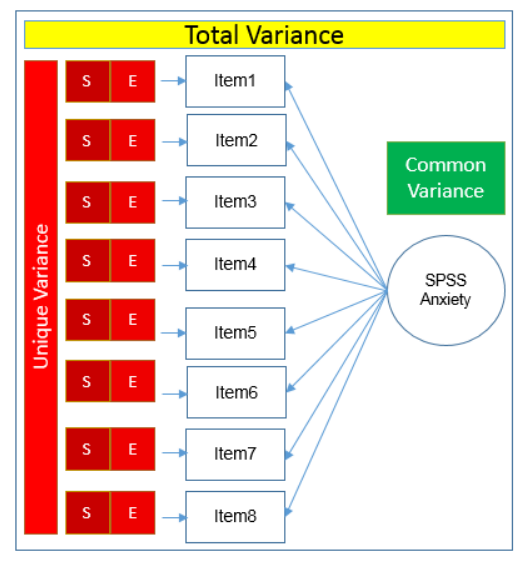

In [1]:
from IPython.display import Image
a = Image(filename='./data/1023_fa.png', width=450)
b = Image(filename='./data/1023_pca.png', width=500)
c = Image(filename='./data/1023_fa2.png', width=450)
display(b,a,c)

[이미지 출처](https://stats.idre.ucla.edu/spss/seminars/efa-spss/)

---
+ PAF(Principal Axis Factoring)

In [2]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df=(df-df.mean())/df.std()
df.drop(['petal length (cm)','sepal width (cm)'], axis= 1, inplace=True)
df.head(2)

,sepal length (cm),petal width (cm)
0,-0.897674,-1.311052
1,-1.139200,-1.311052


In [3]:
df.corr()

,sepal length (cm),petal width (cm)
sepal length (cm),1.000000,0.817941
petal width (cm),0.817941,1.000000


In [4]:
iris_corr = df.corr().values
iris_corr

array([[1.        , 0.81794113],
       [0.81794113, 1.        ]])

In [5]:
eig_val, eig_vec = np.linalg.eig(iris_corr)
eig_val

array([1.81794113, 0.18205887])

In [6]:
eig_vec

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [7]:
pca_values = df.values.dot(eig_vec)

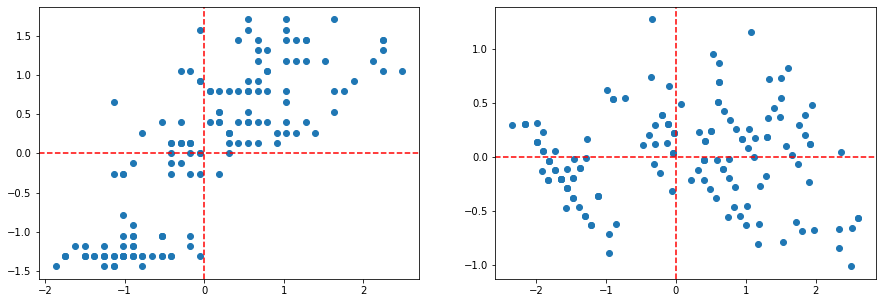

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(df['sepal length (cm)'], df['petal width (cm)'])
plt.axvline(x=0, color='r', linestyle='dashed')
plt.axhline(y=0, color='r', linestyle='dashed')

plt.subplot(1,2,2)
plt.scatter(pca_values[:,0], pca_values[:,1])
plt.axvline(x=0, color='r', linestyle='dashed')
plt.axhline(y=0, color='r', linestyle='dashed')

In [9]:
df.head(2)

,sepal length (cm),petal width (cm)
0,-0.897674,-1.311052
1,-1.139200,-1.311052


In [10]:
from sklearn.linear_model import LinearRegression

sl = df.iloc[:,0].values.reshape(-1,1)
pw = df.iloc[:,1].values.reshape(-1,1)

lm1 = LinearRegression().fit(X=sl, y=pw)
lm1.score(sl,pw)

0.6690276860464137

In [11]:
lm2 = LinearRegression().fit(X=pw, y=sl)
lm2.score(pw,sl)

0.6690276860464137


$$
\text{주성분분석 상관계수행렬}
\quad \quad \quad \quad
\text{인자분석 계산 시작 상관계수행렬}
$$

$$
\begin{bmatrix}
1 & 0.8179 \\
0.8179 & 1
\end{bmatrix}
\quad \quad \quad \quad
\begin{bmatrix}
0.6690 & 0.8179 \\
0.8179 & 0.6690
\end{bmatrix}
$$


+ 상관계수 행렬의 고유값과 고유벡터 계산
+ factor matrix 계산 ( factor와 변수 간의 상관관계 = $\text{고유벡터}^{(\text{변수})} * \text{고유값}^{1/2}$ )
+ communality 계산 ( $\sum (\text{factor와 변수 간의 상관관계})^2$ )
+ 이전 common 분산 - 새 communality > 일정 값이면 새 communality로 이전 common 분산 대체 

+ MLE(Maximum Likelihood Estimation)

In [12]:
a = 2.5 + np.random.randn(100)
b = np.random.randn(100)
sample_a = np.random.choice(a, 10)

In [13]:
sample_a

array([2.49615059, 3.69650162, 1.48960234, 2.05738249, 4.22260748,
       3.56802278, 2.90636348, 3.56802278, 0.74143414, 2.44598835])

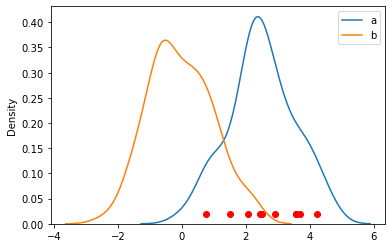

In [14]:
import seaborn as sns
sns.kdeplot(a, label='a')
sns.kdeplot(b, label='b')
plt.scatter(sample_a, [0.02]*10, color='r')
plt.legend()

+ mle : 확률밀도함수 아는 경우

$$P(x|\theta) = \prod_{i=1}^{n}f_{\mu, \sigma^2}(x_i) = \prod_{i=1}^{n}\frac{1}{\sigma\sqrt{2\pi}} \exp \left( -\frac{(x_i-\mu)^2}{2\sigma^2} \right)$$
   
+ mls : 확률밀도함수 모르는 경우
$$
\text{공분산행렬 } \Sigma \text{모수 수 :} p(p+1)/2
$$


\begin{bmatrix}
0 & 0 & 0 \\
0 & 0 & 0 \\
0 & 0 & 0
\end{bmatrix}

$$ 
X-\mu = L_{p\times q}F + \epsilon, \quad cov(\epsilon) = diag[\psi_1, \cdots \psi_p] , \quad \text{모수 수 :} p\times q +p\\
$$
$$
P(x_i| L, \psi) = \int  p(x_i|f, L, \psi) \cdot p(f) df
$$

---

<a id="em"></a>

### EM 알고리즘

+ 2단계 
  + E-step 로그 가능도의 기대값을 구한다 ( 몬테카를로 시뮬레이션 )
$$ Q(L,\psi | L^{(m)}, \psi^{(m)}, x) $$
  + M-step 기대값을 최대화 하는 모수를 추정한다.
$$ L^{(m+1)}, \psi^{(m+1)} = \arg \max_{L,\psi} Q(L,\psi, | L^{(m)}, \psi^{(m)})$$

<a id="gan"></a>
### GAN

+ 1) 생성기 이미지 생성
+ 2) 판별기 이미지 판별
+ 3) loss 계산
+ 4) gradient update


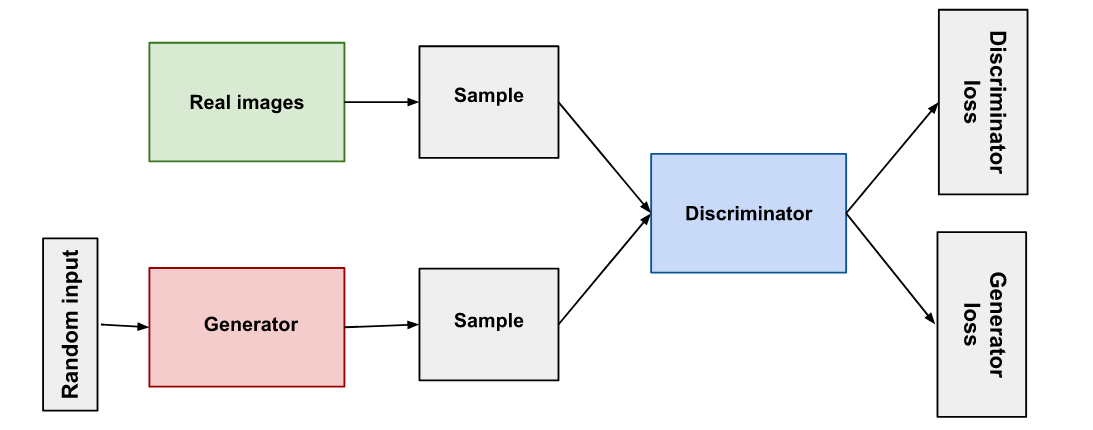

In [15]:
Image(filename='./data/1023_ganmodel.png')

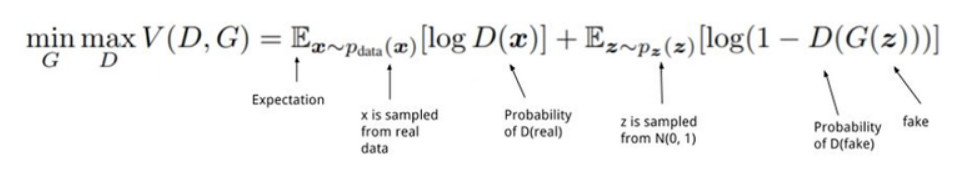

In [16]:
Image(filename='./data/1023_ganloss.jpg')

[dc gan code](https://www.tensorflow.org/tutorials/generative/dcgan?hl=ko)   
[gan tips](https://github.com/soumith/ganhacks)